In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://crashviewer.nhtsa.dot.gov/CrashAPI'
start_year = 2019
end_year = 2020
states = range(1,51)
data = []

In [3]:
# Looked at severity counts. Doesn't give nearly as much information as other methods
#severity_url = f'/analytics/GetInjurySeverityCounts?fromCaseYear={start_year}&toCaseYear={end_year}&state={state}&format=json'
for state in states:
    location_url = f'/crashes/GetCrashesByLocation?fromCaseYear={start_year}&toCaseYear={end_year}&state={state}&county=10&format=json'
    url = base_url + location_url
    data.append(requests.get(url).json())
df = pd.DataFrame(data)
#Goes by state and county. No error message when you enter a county that doesn't exist (Considered for loop prior to this)
df['Results']

0     [[]]
1     [[]]
2     [[]]
3     [[]]
4     [[]]
5     [[]]
6     [[]]
7     [[]]
8     [[]]
9     [[]]
10    [[]]
11    [[]]
12    [[]]
13    [[]]
14    [[]]
15    [[]]
16    [[]]
17    [[]]
18    [[]]
19    [[]]
20    [[]]
21    [[]]
22    [[]]
23    [[]]
24    [[]]
25    [[]]
26    [[]]
27    [[]]
28    [[]]
29    [[]]
30    [[]]
31    [[]]
32    [[]]
33    [[]]
34    [[]]
35    [[]]
36    [[]]
37    [[]]
38    [[]]
39    [[]]
40    [[]]
41    [[]]
42    [[]]
43    [[]]
44    [[]]
45    [[]]
46    [[]]
47    [[]]
48    [[]]
49    [[]]
Name: Results, dtype: object

In [4]:
len(df['Results'])

50

In [5]:
year_url = '/FARSData/GetFARSData?dataset=Accident&caseYear=2019&format=json'
url = base_url + year_url
data_2019 = requests.get(url).json()
fatal_df = pd.DataFrame(data_2019['Results'][0])

In [6]:
fatal_df

,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,...,VE_TOTAL,WEATHER,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHERNAME,WRK_ZONE,WRK_ZONENAME,YEAR
0,13,1:00pm-1:59pm,9,9,0,None,0,None,0,None,...,2,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
1,18,6:00pm-6:59pm,7,7,0,None,0,None,0,None,...,2,2,2,Rain,0,No Additional Atmospheric Conditions,Rain,0,None,2019
2,19,7:00pm-7:59pm,12,12,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,...,3,10,10,Cloudy,0,No Additional Atmospheric Conditions,Cloudy,0,None,2019
3,3,3:00am-3:59am,11,11,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
4,6,6:00am-6:59am,0,0,0,None,0,None,0,None,...,1,5,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,"Fog, Smog, Smoke",0,None,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33514,18,6:00pm-6:59pm,50,50,0,None,0,None,0,None,...,1,6,6,Severe Crosswinds,0,No Additional Atmospheric Conditions,Severe Crosswinds,0,None,2019
33515,13,1:00pm-1:59pm,24,24,0,None,0,None,0,None,...,5,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
33516,15,3:00pm-3:59pm,48,48,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,0,None,2019
33517,5,5:00am-5:59am,4,4,0,None,0,None,0,None,...,1,1,1,Clear,0,No Additional Atmospheric Conditions,Clear,4,"Work Zone, Type Unknown",2019


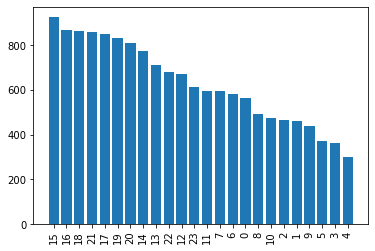

In [7]:
fatal_df.ARR_HOUR.value_counts().keys()
fatal_time = fatal_df[fatal_df.ARR_HOUR != '99']
fatal_time = fatal_time[fatal_time.ARR_HOUR != '88']
plt.bar(fatal_time.ARR_HOUR.value_counts().keys(),fatal_time.ARR_HOUR.value_counts().values)
plt.xticks(rotation = 'vertical')
plt.show()

In [8]:
fatal_df.STATENAME.value_counts()

California              3316
Texas                   3294
Florida                 2950
Georgia                 1377
North Carolina          1284
Tennessee               1040
Ohio                    1039
Pennsylvania             990
Illinois                 938
South Carolina           922
Arizona                  910
Michigan                 902
New York                 876
Alabama                  856
Missouri                 818
Virginia                 774
Indiana                  751
Louisiana                681
Kentucky                 667
Oklahoma                 584
Mississippi              581
Colorado                 544
Wisconsin                526
New Jersey               525
Washington               494
Maryland                 484
Arkansas                 467
Oregon                   451
New Mexico               368
Kansas                   362
Minnesota                333
Massachusetts            321
Iowa                     313
Nevada                   285
Puerto Rico   

In [9]:
fatal_df.TWAY_ID.value_counts()

I-10                 296
I-95                 202
I-40                 195
I-75                 167
US-1                 163
                    ... 
SR-194 MESABA AVE      1
CR-ELIZABETH ROAD      1
SMOKEY RD              1
MARBACH RD             1
N 26TH ST              1
Name: TWAY_ID, Length: 16237, dtype: int64

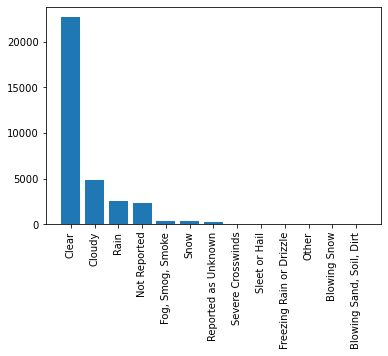

In [10]:
plt.bar(fatal_df.WEATHERNAME.value_counts().keys(),fatal_df.WEATHERNAME.value_counts().values)
plt.xticks(rotation = 'vertical')
plt.show()

In [11]:
fatal_df['LATITUDE'] = fatal_df.LATITUDE.values.astype('float')
fatal_df['LONGITUD'] = fatal_df.LONGITUD.values.astype('float')

In [12]:
len(fatal_df[fatal_df['LATITUDE'] > 90]['LATITUDE'])
print(len(fatal_df))
fatal_df = fatal_df[fatal_df['LATITUDE'] < 90]
print(len(fatal_df))
fatal_df = fatal_df[fatal_df['LONGITUD'] < 180]


33519
33465


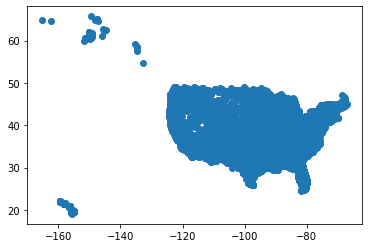

In [13]:
plt.scatter(fatal_df.LONGITUD,fatal_df.LATITUDE)

In [14]:
fatal_df[fatal_df['LONGITUD'] > 90]['STATENAME']
fatal_df = fatal_df[fatal_df['LONGITUD'] < 90]


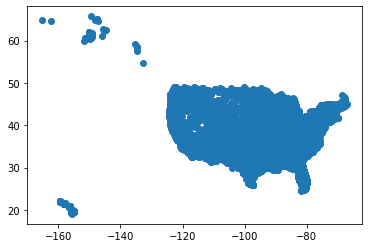

In [15]:
plt.scatter(fatal_df.LONGITUD,fatal_df.LATITUDE)

In [16]:
fatal_df.to_csv('csv_files/fatal_accidents_2019.csv')